<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/Distance_and_the_Curse_of_Dimensionality_unsupervised_ML_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns, pandas as pd, numpy as np

In [2]:
from matplotlib import pyplot as plt
import numpy as np

Curse of Dimensionality
DEMO objectives:
Gain understanding of why observations are far apart in high-dimensional space
See an example of how adding dimensions degrades model performance for classification
Learn how to fight the curse of dimensionality in your modeling projects
In high-dimensional space, points tend to be far apart.
This impacts data analysis. Intuitively, clustering is difficult when points are far away from each other: If my next nearest neighbor is very far away, does it still make sense to call it my neighbor? This notebook will show why high-dimensional space leads to sparse data.


A circle inside a square
Let's start by drawing a unit circle inside of a square.

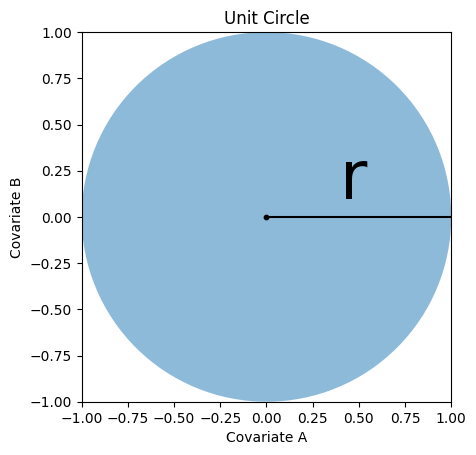

In [3]:
def make_circle(point=0):
    fig = plt.gcf()
    ax = fig.add_subplot(111, aspect='equal')
    fig.gca().add_artist(plt.Circle((0,0),1,alpha=.5))
    ax.scatter(0,0,s=10,color="black")
    ax.plot(np.linspace(0,1,100),np.zeros(100),color="black")
    ax.text(.4,.1,"r",size=48)
    ax.set_xlim(left=-1,right=1)
    ax.set_ylim(bottom=-1,top=1)
    plt.xlabel("Covariate A")
    plt.ylabel("Covariate B")
    plt.title("Unit Circle")

    if point:
        ax.text(.55,.9,"Far away",color="purple")
        ax.scatter(.85,.85,s=10,color="purple")
    else:
        plt.show()

make_circle()

Each axis is a different covariate. Imagine we've standard scaled our data, so they're centered on zero. This means that the average for each covariate is now zero, or the center of our circle. Points that our outside the unit circle would be harder to classify because the values of their covariates are far from the mean.

[ ]:

make_circle(1)

How much of the square is outside the circle? And the cube outside the sphere, etc.
We've concluded that our purple point above would be hard to classify because it's far away from the rest of our observations. But what percentage of our points in the square are outside of the circle, and thus "far away"? Let's do some math!

Since the square has length  2𝑟
2
𝑟
  and area  (2𝑟)2
(
2
𝑟
)
2
 , the percentage of the square outside the circle is: 1 -  𝜋𝑟2(2𝑟)2=1−𝜋4
𝜋
𝑟
2
(
2
𝑟
)
2
=
1
−
𝜋
4
  = ~ 21%

But what about a cube? To illustrate, we will use matplotlib's 3-D axis which allows the '3d' projection, as well as the itertools library, which offers a number of efficient tools for looping and combining lists. We will use the product (cartesian product) and combinations (unique subsequences) functions.

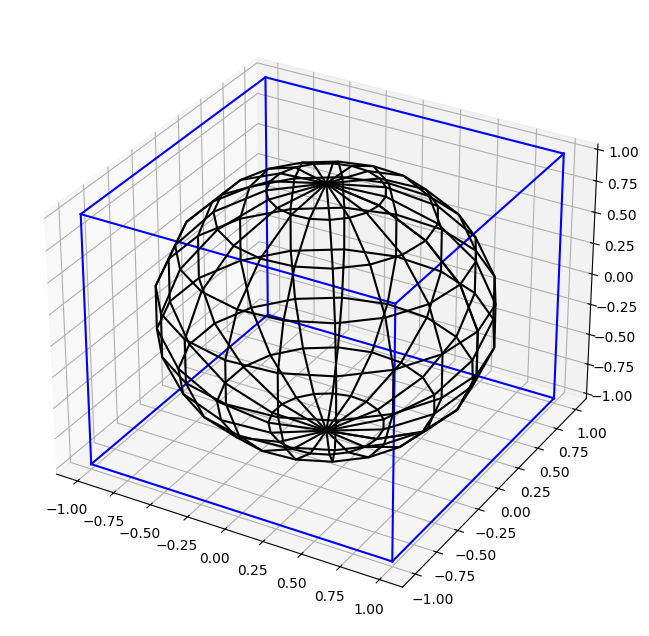

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

# Create figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s - e)) == 2:  # Ensuring only adjacent edges are connected
        ax.plot3D([s[0], e[0]], [s[1], e[1]], [s[2], e[2]], color="blue")

# Draw sphere on the same axis
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="black")

plt.show()


The volume of the sphere is given by the forumula:  43𝜋𝑟3
4
3
𝜋
𝑟
3
 , and since the cube has a radius of  2𝑟
2
𝑟
 , it has volume  (2𝑟)3
(
2
𝑟
)
3
 .

This allows us to calculate the percent of the cube's volume that's outside of the sphere: 1-  43𝜋𝑟3(2𝑟)3=1−𝜋6
4
3
𝜋
𝑟
3
(
2
𝑟
)
3
=
1
−
𝜋
6
  = ~ 48%

Can we generalize to more than three dimensions?
Let's draw a bunch of random points from a 0-1 distribution, then measure how far away from the origin they are.

In [7]:
# Draw a sample of data in two dimensions
sample_data = np.random.sample((5,2))
print("Sample data:\n", sample_data, '\n')

def norm(x):
    ''' Measure the distance of each point from the origin.

    Input: Sample points, one point per row
    Output: The distance from the origin to each point
    '''
    return np.sqrt( (x**2).sum(1) ) # np.sum() sums an array over a given axis

def in_the_ball(x):
    ''' Determine if the sample is in the circle.

    Input: Sample points, one point per row
    Output: A boolean array indicating whether the point is in the ball
    '''
    return norm(x) < 1 # If the distance measure above is <1, we're inside the ball


for x, y in zip(norm(sample_data),in_the_ball(sample_data)):
    print("Norm = ", x.round(2), "; is in circle? ", y)

Sample data:
 [[0.69994546 0.71659825]
 [0.01251822 0.37891217]
 [0.81233384 0.82032779]
 [0.39270822 0.18450808]
 [0.78244707 0.64353307]] 

Norm =  1.0 ; is in circle?  False
Norm =  0.38 ; is in circle?  True
Norm =  1.15 ; is in circle?  False
Norm =  0.43 ; is in circle?  True
Norm =  1.01 ; is in circle?  False


In [8]:
def what_percent_of_the_ncube_is_in_the_nball(d_dim,
                                              sample_size=10**4):
    shape = sample_size,d_dim
    data = np.array([in_the_ball(np.random.sample(shape)).mean()
                     for iteration in range(100)])
    return data.mean()

dims = range(2,15)
data = np.array(list(map(what_percent_of_the_ncube_is_in_the_nball,dims)))


for dim, percent in zip(dims,data):
    print("Dimension = ", dim, "; percent in ball = ", percent)

Dimension =  2 ; percent in ball =  0.7855440000000001
Dimension =  3 ; percent in ball =  0.523688
Dimension =  4 ; percent in ball =  0.308203
Dimension =  5 ; percent in ball =  0.16469399999999998
Dimension =  6 ; percent in ball =  0.080625
Dimension =  7 ; percent in ball =  0.037059
Dimension =  8 ; percent in ball =  0.01577
Dimension =  9 ; percent in ball =  0.006434999999999999
Dimension =  10 ; percent in ball =  0.002532
Dimension =  11 ; percent in ball =  0.0009209999999999998
Dimension =  12 ; percent in ball =  0.00032
Dimension =  13 ; percent in ball =  0.000105
Dimension =  14 ; percent in ball =  4.3e-05


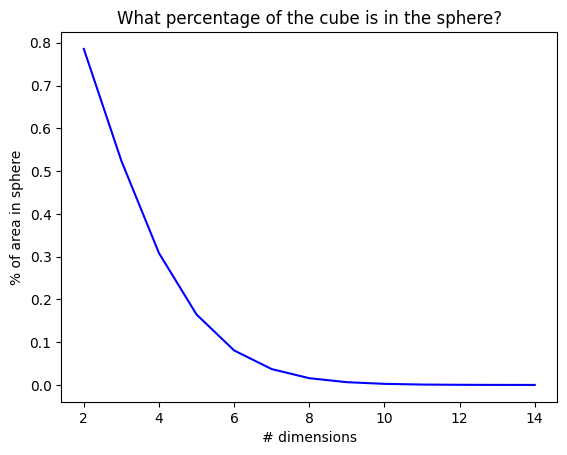

In [9]:
# Let's plot the above percentages

plt.plot(dims, data, color='blue')
plt.xlabel("# dimensions")
plt.ylabel("% of area in sphere")
plt.title("What percentage of the cube is in the sphere?")
plt.show()

Check for understanding¶
What happens to the percentage of the area in the sphere as we increase the number of dimensions? What does this mean about how the dispersion of our data?








Measuring the distance from the center of the cube to the nearest point
Let's continue with our drawing of random points in the cube. This time, we'll draw a bunch of points, then measure the distance of all the points to the center of the cube to see how close the closest point is to the center.

If we find out that the closest point is far from the center in high dimensions, that gives us more evidence that increasing dimensions will make it harder to classify our data properly.

In [10]:
def get_min_distance(dimension, sample_size=10**3):
    ''' Sample some random points and find the closet
    of those random points to the center of the data '''
    points = np.random.sample((sample_size,dimension))-.5   # centering our data
    return np.min(norm(points))

def estimate_closest(dimension):
    ''' For a given dimension, take a random sample in that dimension and then find
        that sample's closest point to the center of the data.
        Repeat 100 times for the given dimension and return the min/max/mean
        of the distance for the nearest point. '''
    data = np.array([get_min_distance(dimension) for _ in range(100)])
    return data.mean(), data.min(), data.max()

# Calculate for dimensions 2-100
dims = range(2,100)
min_distance_data = np.array(list(map(estimate_closest,dims)))

# Test it for dimension 6
print("For dimension 6: ", estimate_closest(6))

For dimension 6:  (0.2294830842418328, 0.12068423519883165, 0.3184694552736238)


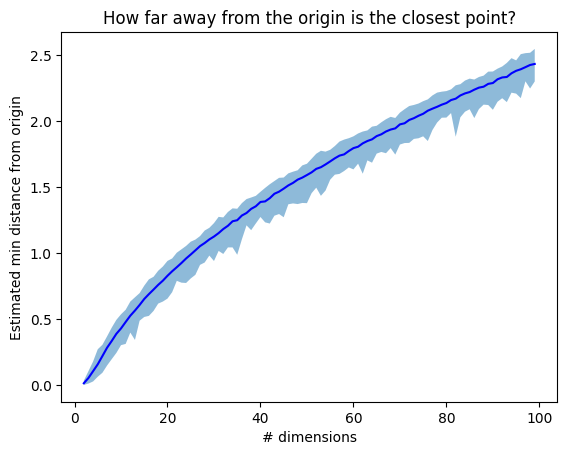

In [11]:
# Plot the min/max/mean of the closest point for each dimension using sampling

plt.plot(dims,min_distance_data[:,0], color='blue')
plt.fill_between(dims, min_distance_data[:,1], min_distance_data[:,2],alpha=.5)
plt.xlabel("# dimensions")
plt.ylabel("Estimated min distance from origin")
plt.title("How far away from the origin is the closest point?");

Check for understanding¶
What would we have to do to get similar density of points as the low dimensions if we wanted to use higher dimensions of data?

How to fight the curse of dimensionality
The curse of dimensionality is a common hurdle in real-world predictive modeling. We've already seen this in our bag-of-words approach to NLP. How can we create good models in cases where our data is of high dimensionality?

Feature selection: Use domain knowledge to reduce the number of features included in the model
Feature extraction: Use dimensionality reduction techniques (e.g. PCA) to transform the raw data into a lower number of features that preserve (most of) the variability in the data
We'll talk more about PCA next.








How does high dimensionality affect model performance?
We'll test model performance (classification accuracy) by creating some random data for classification, one set with a low number of features and another with a very high number of features. We'll then compare their performance using the same classification algorithm.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Create a dataset with two features

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=2)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [14]:
DT =  DecisionTreeClassifier()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)

In [15]:
print("Score from two-feature classifier: ", score)

Score from two-feature classifier:  0.875


In [16]:
# Now do the same thing but with 200 features

X, y = make_classification(n_features=200, n_redundant=0, n_informative=200,
                           random_state=1, n_clusters_per_class=2)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

DT =  DecisionTreeClassifier()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)

In [17]:
print("Score from 200-feature classifier: ", score)

Score from 200-feature classifier:  0.475


Here we see that adding additional features, even if informative, can lead to worse model performance (due to increased overfitting of training data.

Comparing accuracy of classification against number of features
Let's see what happens if we keep adding features to our classification problem. We'll hold the number of classes at three in order to see how the curse of dimensionality hurts our model performance.

In [18]:
scores = []

increment, max_features = 50, 4000

for num in np.linspace(increment, max_features, increment, dtype='int'):

    X, y = make_classification(n_features=num, n_redundant=0,
                               random_state=1, n_clusters_per_class=1, n_classes = 3)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)

    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)


    DT =  DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    scores.append( DT.score(X_test, y_test) )

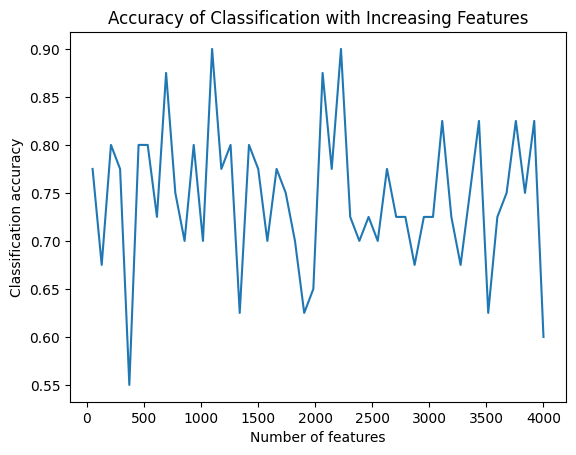

In [19]:
plt.plot(np.linspace(increment, max_features, increment, dtype='int'),scores)
plt.title("Accuracy of Classification with Increasing Features")
plt.xlabel("Number of features")
plt.ylabel("Classification accuracy");

As we can see from the chart, adding features can lead to reductions in accuracy -- in this example accuracy is highly volatile in the number of features, and increasing features can reduce accuracy. Additionally, in our example, we specified that none of the features are redundnant (n_redundant=0). In practice, the situation is often worse as several of the features may be either redundant or not relevant. For example, if we are predicting customer churn using a variety of customer characteristics, we may have collected extensive data for each customer across many dimensions. This is an example of high-dimensional, which can make it difficult to apply unsupervised learning methods directly and potentially to lead to issues with the curse of dimensionality.

LAB 2
Distance Metrics


Use cases of Distance Metrics
Classification: KNN model uses a distance metric to find a data point's top k nearest neighbors.
Clustering: K-Means algorithm assigns data points to the nearest centroids using a distance metric.
Natural Language Processing: NLP uses the cosine similarity distance metric to filter out irrelevant documents from the corpus once the unstructured data is transformed into vector form.
Why different distance metrics matter?
There are many ways to define the distance between two objects. To give you a real-life example, suppose you want to go from one city to another on a map, there will be at least two different distances. One is the driving distance and the other could be the flying distance. Depending on how you choose to travel, one of the distances could make completely no sense to you.


Image from PxHere

Same idea applies to Machine Learning, choosing the correct distance metric is critical to the performance of the downstream task.

In this notebook, you will practice applying the distance metrics learned in this course. Using real-world data, you will analyze similarities and dissimilarities in data. You will also be able to understand how various algorithms such as DBSCAN are affected by different distance metrics.

Table of Contents
Objectives
Datasets
Setup
Installing Required Libraries
Importing Required Libraries
Defining Helper Functions
Euclidean Distance
General Equation
Manhattan Distance
General Equation
Cosine Distance
General Equation
Analyzing Distance Metrics with DBSCAN
DBSCAN using Euclidean
DBSCAN using Manhattan
DBSCAN using Cosine
Jaccard Distance
General Equation
Exercises

Exercise 1 - Jaccard distance
Exercise 2 - Euclidean distance and manhattan distance
Exercise 3 - Cosine Distance
Exercise 4 - Using sklearn.metrics.pairwise
Objectives
After completing this lab you will be able to:

Understand the mathematics behind the euclidean, manhattan, cosine, and jaccard distance metrics.
Understand the use cases of the covered distance metrics.
Datasets
Datasets for this lab are gathered from the UCI Machine Learning Repository under the MIT License.

Setup
For this lab, we will be using the following libraries:

pandas for managing the data.
numpy for mathematical operations.
matplotlib for visualizing the data.
scipy for complex numerical operations.
sklearn for machine learning and machine-learning-pipeline related functions.

Installing Required Libraries
The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the # sign before !mamba in the code cell below.

In [20]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!mamba install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 scipy==1.7.3
!mamba install -qy scikit-learn==1.0.2
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 ... "

/bin/bash: line 1: mamba: command not found


In [23]:
!pip install scikit-learn==1.0.2 --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 48.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [22]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import scipy
from scipy.spatial.distance import euclidean, cityblock, cosine
import sklearn.metrics.pairwise

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

In [27]:
import sklearn
print(sklearn.__version__)  # Should print 1.0.2


1.6.1


In [28]:
!pip install scikit-learn==1.0.2 --force-reinstall --quiet


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [29]:
import sklearn
print(sklearn.__version__)  # Should print 1.0.2


1.6.1


In [31]:
!pip install scikit-learn==1.0.2 --force-reinstall --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Defining Helper Functions
In the section below, we will define helper functions that will help analyze different distance metrics

Average Distance

This function will return the average distance between two sets of data given our provided distance metric, i.e., each point in  𝑋
𝑋
  with each other point in  𝑌
𝑌
 . Refer to the image below:

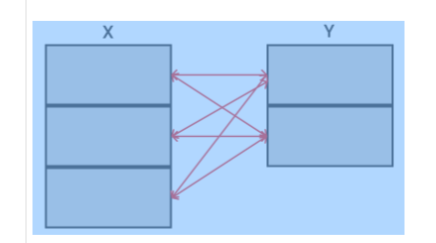

In [32]:
# This function will allow us to find the average distance between two sets of data
def avg_distance(X1, X2, distance_func):
    from sklearn.metrics import jaccard_score
    #print(distance_func)
    res = 0
    for x1 in X1:
        for x2 in X2:
            if distance_func == jaccard_score: # the jaccard_score function only returns jaccard_similarity
                res += 1 - distance_func(x1, x2)
            else:
                res += distance_func(x1, x2)
    return res / (len(X1) * len(X2))

Pairwise Distance

This function will return the average pairwise distance between two sets of data. The distance for each row in  𝑋
𝑋
  from the corresponding row in  𝑌
𝑌
 . The number of rows of in the two sets of data should be equal. Refer to the image below: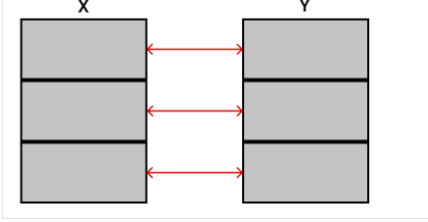

In [33]:
# This function will allow us to find the average pairwise distance
def avg_pairwise_distance(X1, X2, distance_func):
    return sum(map(distance_func, X1, X2)) / min(len(X1), len(X2))

Load the datafile into pandas.DataFrame
Before working with the data, it must be loaded into a pandas.DataFrame:

In [34]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
df.drop(['petal_width'], axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


In [36]:
species = df['species'].unique()
print(species)

['setosa' 'versicolor' 'virginica']


Let's view the three species of irises' data in 3D using matplotlib

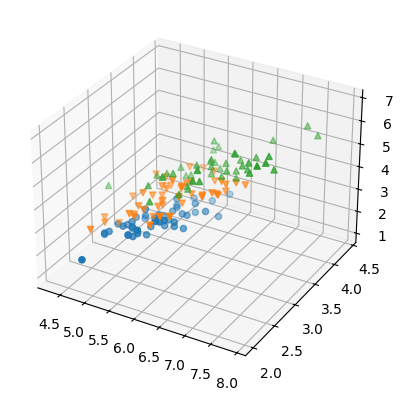

In [37]:
attrs = ['sepal_length', 'sepal_width', 'petal_length']
markers = ['o', 'v', '^']
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for specie, marker in zip(species, markers):
    specie_data = df.loc[df['species'] == specie][attrs]
    xs, ys, zs = [specie_data[attr] for attr in attrs]
    ax.scatter(xs, ys, zs, marker=marker)
plt.show()

Create variables for the species' data, as np.ndarrays:

In [38]:
setosa_data = df.loc[df['species'] == 'setosa'][attrs].to_numpy()
versicolor_data = df.loc[df['species'] == 'versicolor'][attrs].to_numpy()
virginica_data = df.loc[df['species'] == 'virginica'][attrs].to_numpy()

In [39]:
setosa_data.shape

(50, 3)

In this task, you will learn and practice applying Euclidean distance.

Euclidean distance is simply the physical distance between two points.

Euclidean distance is useful when physical distance matters most.

We know from high school math the distance between two points on a plane (2D)  (𝑥1,𝑦1),(𝑥2,𝑦2)
(
𝑥
1
,
𝑦
1
)
,
(
𝑥
2
,
𝑦
2
)
  is:

(𝑥2−𝑥1)2+(𝑦2−𝑦1)2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√
(
𝑥
2
−
𝑥
1
)
2
+
(
𝑦
2
−
𝑦
1
)
2


The distance between two points in 3D  (𝑥1,𝑦1,𝑧1),(𝑥2,𝑦2,𝑧2)
(
𝑥
1
,
𝑦
1
,
𝑧
1
)
,
(
𝑥
2
,
𝑦
2
,
𝑧
2
)
  is:

(𝑥2−𝑥1)2+(𝑦2−𝑦1)2+(𝑧2−𝑧1)2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√
(
𝑥
2
−
𝑥
1
)
2
+
(
𝑦
2
−
𝑦
1
)
2
+
(
𝑧
2
−
𝑧
1
)
2


General Equation
The general equation for the euclidean distance between two points in n-dimentions  𝒂=[𝑎1,𝑎2,…,𝑎𝑛],𝒃=[𝑏1,𝑏2,…,𝑏𝑛]
𝑎
=
[
𝑎
1
,
𝑎
2
,
…
,
𝑎
𝑛
]
,
𝑏
=
[
𝑏
1
,
𝑏
2
,
…
,
𝑏
𝑛
]
  is:

∑𝑖=1𝑛(𝑏𝑖−𝑎𝑖)2⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯
∑
𝑖
=
1
𝑛
(
𝑏
𝑖
−
𝑎
𝑖
)
2


Or for those inclined to Linear Algebra:

||𝒃−𝒂||
|
|
𝑏
−
𝑎
|
|


We can use the function euclidean from scipy.spatial.distance to compute the euclidean distance between two points.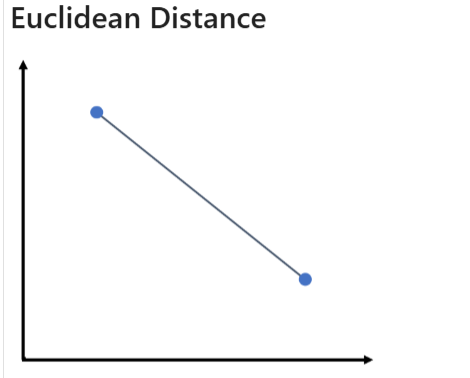

In [40]:
euclidean([0, 0], [3, 4])

5.0

Let's find the average euclidean distance between the data of different species of irises
Average euclidean distance between setosa and setosa:







Average euclidean distance between setosa and versicolor:

In [41]:
avg_distance(setosa_data, versicolor_data, euclidean)

3.1110307382429827

Average euclidean distance between setosa and virginica:

In [42]:
avg_distance(setosa_data, virginica_data, euclidean)

4.470017704302476

We can also determine the euclidean distances between two points using paired_euclidean_distances from sklearn.metrics.pairwise:

In [43]:
from sklearn.metrics.pairwise import paired_euclidean_distances

In [44]:
X = np.array([[0, 0]], dtype=float)
Y = np.array([[3, 4]], dtype=float)
paired_euclidean_distances(X, Y).mean()

5.0

In [45]:
avg_pairwise_distance(X, Y, euclidean)

5.0

In [46]:
M, N = setosa_data.shape
print(f'{M} points and each column is {N} dimensions')

50 points and each column is 3 dimensions


In [47]:
row_dist=paired_euclidean_distances(setosa_data, versicolor_data)
row_dist

array([3.81968585, 3.44963766, 4.22018957, 2.77488739, 3.62353419,
       3.02324329, 3.71348893, 2.06155281, 3.88329757, 2.45153013,
       2.65518361, 2.85131549, 2.97321375, 4.02616443, 2.64764046,
       3.33166625, 3.33016516, 2.90172363, 3.26343377, 2.77488739,
       3.14642654, 2.83901391, 4.39431451, 3.20156212, 2.92745623,
       3.2249031 , 3.72021505, 3.84057287, 3.24037035, 2.22934968,
       2.41246762, 2.41867732, 2.84253408, 4.02367991, 3.04302481,
       3.45398321, 3.62767143, 3.318132  , 3.04630924, 2.68700577,
       3.26649659, 3.73363094, 3.1       , 2.0808652 , 2.59807621,
       2.94108823, 2.81602557, 3.32565783, 1.93132079, 2.83372546])

In [48]:
row_dist.mean()

3.1208199582684055

In [49]:
paired_euclidean_distances(setosa_data, virginica_data).mean()

4.467297089536804

In [50]:
avg_pairwise_distance(setosa_data, virginica_data, euclidean)

4.467297089536803

n this task, you will learn and practice applying Manhattan distance, sometimes called the  𝐿1
𝐿
1
  norm and "cityblock" distance. The Manhattan distance is even simpler than euclidean distance.

It can be described as the sum of the absolute value of the difference in each dimention of two points.

Manhattan distance can be preferrable to euclidean distance in high-dimentional situations.

The Manhattan distance between two points on a plane (2D)  (𝑥1,𝑦1),(𝑥2,𝑦2)
(
𝑥
1
,
𝑦
1
)
,
(
𝑥
2
,
𝑦
2
)
  is:

|𝑥2−𝑥1|+|𝑦2−𝑦1|
|
𝑥
2
−
𝑥
1
|
+
|
𝑦
2
−
𝑦
1
|


General Equation
The general equation for the manhattan distance between two points in N-dimentions  𝒂=[𝑎1,𝑎2,…,𝑎𝑛],𝒃=[𝑏1,𝑏2,…,𝑏𝑛]
𝑎
=
[
𝑎
1
,
𝑎
2
,
…
,
𝑎
𝑛
]
,
𝑏
=
[
𝑏
1
,
𝑏
2
,
…
,
𝑏
𝑛
]
  is:

∑𝑖=1𝑛|𝑏𝑖−𝑎𝑖|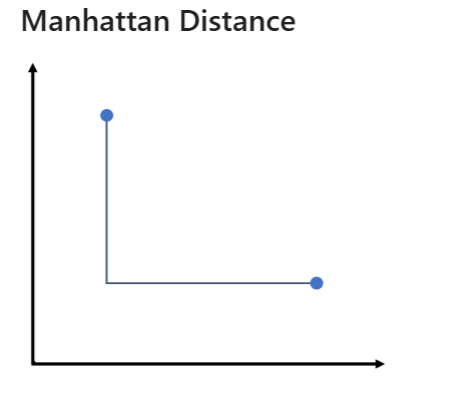

We can use the function cityblock from scipy.spatial.distance to compute the manhattan distance between two points

In [51]:
cityblock([1, 1], [-2, 2])

4

Let's find the average manhattan distance between the data of different species of irises
Average manhattan distance between setosa and setosa:

In [52]:
avg_distance(setosa_data, setosa_data, cityblock)

0.9921600000000026

In [53]:
avg_distance(setosa_data, versicolor_data, cityblock)

4.439119999999999

In [54]:
avg_distance(setosa_data, virginica_data, cityblock)

6.219039999999988

We can also determine the pairwise Manhattan Distances between two points using manhattan_distances from sklearn.metrics.pairwise:

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances

In [55]:
X = np.array([[1, 1]])

Y = np.array([[-2, 2]])

In [ ]:
manhattan_distances(X, Y)

In this task, you will learn and practice applying Cosine distance.

The cosine distance between two points can be thought of as one minus the cosine of the angle between them with respect to the origin.

As such, it has a value in the range  [0,2]
[
0
,
2
]
  where:

0
0
  means "in the same direction"
1
1
  means "perpendicular"
2
2
  means "in the opposite direction."
So, the lower the cosine distance, the more-similar two points are (in direction).

Cosine distance is useful when "direction" matters more than euclidean distance

The cosine distance between two points on a plane (2D)  (𝑥1,𝑦1),(𝑥2,𝑦2)
(
𝑥
1
,
𝑦
1
)
,
(
𝑥
2
,
𝑦
2
)
  is:

1−𝑥1⋅𝑥2+𝑦1⋅𝑦2𝑥21+𝑦21⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√+𝑥22+𝑦22⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√
1
−
𝑥
1
⋅
𝑥
2
+
𝑦
1
⋅
𝑦
2
𝑥
1
2
+
𝑦
1
2
+
𝑥
2
2
+
𝑦
2
2


General Equation
The general equation for the cosine distance between two points in N-dimentions  𝒂=[𝑎1,𝑎2,…,𝑎𝑛],𝒃=[𝑏1,𝑏2,…,𝑏𝑛]
𝑎
=
[
𝑎
1
,
𝑎
2
,
…
,
𝑎
𝑛
]
,
𝑏
=
[
𝑏
1
,
𝑏
2
,
…
,
𝑏
𝑛
]
  is:

1−∑𝑛𝑖=1𝑎𝑖⋅𝑏𝑖∑𝑛𝑖=1𝑎2𝑖⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√+∑𝑛𝑖=1𝑏2𝑖⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√
1
−
∑
𝑖
=
1
𝑛
𝑎
𝑖
⋅
𝑏
𝑖
∑
𝑖
=
1
𝑛
𝑎
𝑖
2
+
∑
𝑖
=
1
𝑛
𝑏
𝑖
2


Or for those inclined to linear algebra:

1−𝒂⋅𝒃||𝒂||⋅||𝒃||

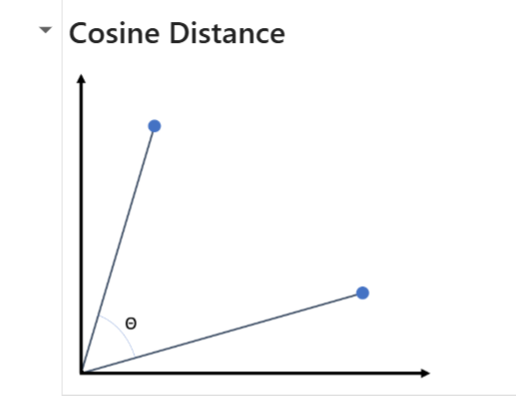

In [56]:
cosine([1, 1], [-1, -1])

2.0

In [57]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/auto-mpg.data',
    header=None, delim_whitespace=True,
    names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [58]:
df['car_name'] = df['car_name'].str.split(n=1).apply(lambda lst: lst[0]).replace('chevrolet', 'chevy')
df.rename(columns={'car_name': 'make'}, inplace=True)
df = df[['mpg', 'weight', 'make']]
df.head()

,mpg,weight,make
0,18.0,3504.0,chevy
1,15.0,3693.0,buick
2,18.0,3436.0,plymouth
3,16.0,3433.0,amc
4,17.0,3449.0,ford


Normalize the numerical data (important for cosine distance if you want features to have "equal weight")

In [59]:
dfn = df[['mpg', 'weight']]
df[['mpg', 'weight']] = (dfn-dfn.min())/(dfn.max()-dfn.min())
df.head()

,mpg,weight,make
0,0.239362,0.536150,chevy
1,0.159574,0.589736,buick
2,0.239362,0.516870,plymouth
3,0.186170,0.516019,amc
4,0.212766,0.520556,ford


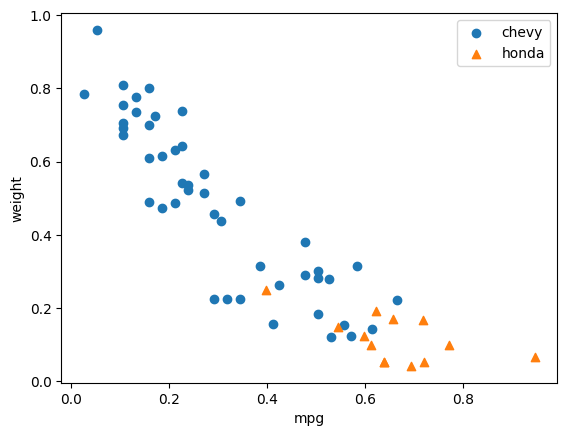

In [60]:
chevy = df.loc[df['make'] == 'chevy']
honda = df.loc[df['make'] == 'honda']

plt.scatter(chevy['mpg'], chevy['weight'], marker='o', label='chevy')
plt.scatter(honda['mpg'], honda['weight'], marker='^', label='honda')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

In [61]:
chevy_data = chevy[['mpg', 'weight']].to_numpy()
honda_data = honda[['mpg', 'weight']].to_numpy()

In [62]:
avg_distance(chevy_data, chevy_data, cosine)

0.1686029684688174

In [63]:
avg_distance(honda_data, honda_data, cosine)

0.017557196207440316

In [64]:
avg_distance(honda_data, chevy_data, cosine)

0.3511900540950527

We can also determine the pairwise cosine distance between two points using cosine_distances from sklearn.metrics.pairwise:

In [65]:
from sklearn.metrics.pairwise import cosine_distances

In [66]:
X = np.array([[1, 1]])
Y = np.array([[-1, -1]])
cosine_distances(X, Y)

array([[2.]])

You can derive the cosine distance from the cosine similarity as follows

cosine_distance = 1 - cosine_similarity

In [67]:
from sklearn.metrics.pairwise import cosine_similarity
1-cosine_similarity(X,Y)

array([[2.]])

In [68]:
cosine_distances(chevy_data, chevy_data).mean()

0.1686029684688178

In [69]:
cosine_distances(honda_data, chevy_data).mean()

0.35119005409505294

Analyzing Distance Metrics with DBSCAN
Now that we've learned various numerical distance metrics, let's see how they affect a clustering algorithm.

We begin by importing the DBSCAN object from sklearn.neighbors and downloading a synthetic dataset for clustering:

In [70]:
from sklearn.cluster import DBSCAN
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/synthetic_clustering.csv')
df.head()

,x,y
0,-0.285980,1.149042
1,-0.296288,1.204223
2,-1.157672,-1.406545
3,-0.653802,-0.993525
4,1.347072,1.329942


DBSCAN using Euclidean:

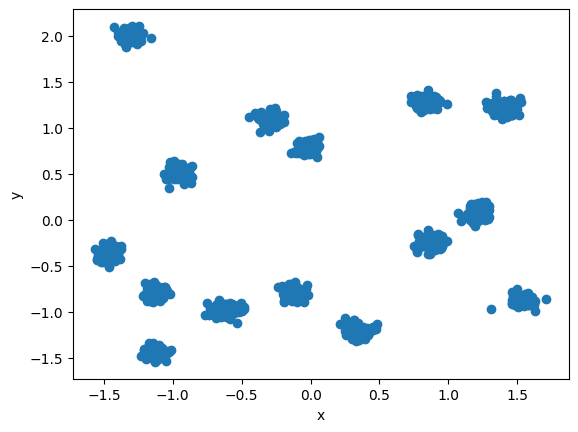

In [71]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

DBSCAN using Manhattan

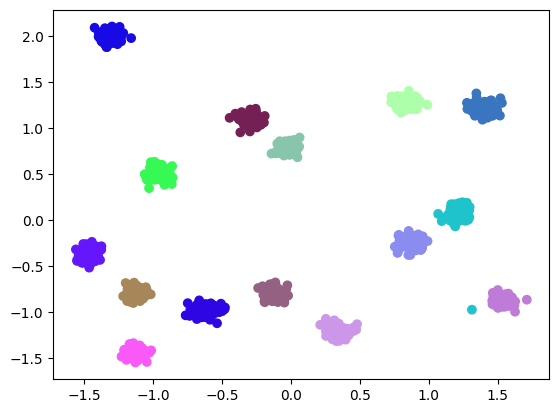

In [72]:
dbscan = DBSCAN(eps=0.1, metric=euclidean)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

DBSCAN using Cosine

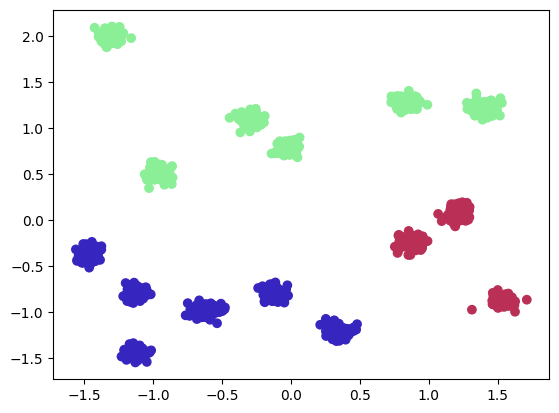

In [73]:
dbscan = DBSCAN(eps=0.1, metric=cosine)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

Clearly, euclidean and manhattan distances have very similar results.

However, using cosine distance, DBSCAN groups points based on their angle, leading to unique results which is some cases may be very useful.

Jaccard Distance
In this task, you will learn and practice applying Jaccard distance.

The Jaccard distance is used to compute the dissimilarity/distance of two sets of objects.

The Jaccard distance between two sets is a value in the range  [0,1]
[
0
,
1
]
  where:

1
1
  means the two sets have nothing in common.
0
0
  means the two sets are identical.
So the greater the jaccard distance, the less similar the sets.

Jaccard distance is useful when comparing two sets of (usually) non-numerical objects

General Equation
The general equation for the jaccard distance between two sets  𝐴
𝐴
  and  𝐵
𝐵
  is:

1−|𝐴∩𝐵||𝐴∪𝐵|
1
−
|
𝐴
∩
𝐵
|
|
𝐴
∪
𝐵
|


∩
∩
  means "set intersection"
∪
∪
  means "union"
|𝑆|
|
𝑆
|
  means the "length of set  𝑆
𝑆
 "
We can use sklearn.metrics.jaccard_score to compute the jaccard distance between categorical data.

NOTE: sklearn.metrics.jaccard_score calculates the jaccard similarity score, which is 1 - jaccard distance.

In [74]:
from sklearn.metrics import jaccard_score

For this exercise, we will use a different dataset.

Download the dataset "breast-cancer.data" which contains information about people diagnosed with breast cancer:

In [75]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/breast-cancer.data',
    header=None,
    names=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'])
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [76]:
print(sorted(df['age'].unique()))
print(df.age.value_counts())

['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
age
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: count, dtype: int64


As you can see, the data values are categorical rather than real numerical values.

To obtain the average jaccard distance between two dataframes (df1, df2), we first need to convert the categorical variables into one-hot encoded (binary) variables. This allows us to easily compute the individual jaccard distance between each row in df1 and other row in df2, since we could just view the rows as sets that contain 0's and 1's.

We can achieve this using the OneHotEncoder from sklearn.preprocessing:

In [77]:
from sklearn.preprocessing import OneHotEncoder

OH = OneHotEncoder()

In [78]:
X = OH.fit_transform(df.loc[:, df.columns != 'age']).toarray()
print(f"By using onehot encoding, we obtained a 2d array with shape {X.shape} that only has value 0 and 1 ")

By using onehot encoding, we obtained a 2d array with shape (286, 39) that only has value 0 and 1 


In [79]:
X30to39 = X[df[df.age == '30-39'].index]
X60to69 = X[df[df.age == '60-69'].index]

X30to39.shape, X60to69.shape

((36, 39), (57, 39))

In [84]:
avg_distance(X30to39, X30to39, jaccard_score)

0.6435631883548536

In [85]:
avg_distance(X60to69, X60to69, jaccard_score)

0.6182114564956281

In [86]:
avg_distance(X30to39, X60to69, jaccard_score)

0.7324778699972173

Therefore, it seems there are some disparate trends between the 30-39 and 60-69 age groups

EXERCISE 1

In [87]:
# Find the jaccard distance between the words in the following two sentences:
sentence1 = 'Hello everyone and welcome to distance metrics'
sentence2 = 'Hello world and welcome to distance metrics'

In [88]:
s1set = set(sentence1.split())
s2set = set(sentence2.split())
ans = len(s1set.intersection(s2set)) / len(s1set.union(s2set))

Exercise 2 - Euclidean distance and manhattan distance

In [89]:
# Find the absolute value of the difference between the euclidean and manhattan distances of the two 3D points:
p1 = np.array([4, -3, 1])
p2 = np.array([-5, 1, -7])

In [90]:
import scipy.special
euclidean = scipy.spatial.distance.euclidean(p1, p2)
manhattan = scipy.spatial.distance.cityblock(p1, p2)
ans = abs(manhattan - euclidean)

Exercise 3 - Cosine distance

In [91]:
# Find the cosine distance between the following two points:
p1 = np.array([1, 2, 3]).reshape(1, -1)
p2 = np.array([-2, -4, -6]).reshape(1, -1)

In [92]:
ans = cosine_distances(p1, p2)

Exercise 4 - Using sklearn.metrics.pairwise






Use:

sklearn.metrics.pairwise.paired_euclidean_distances
sklearn.metrics.pairwise.paired_manhattan_distances
to find the pairwise distance between the following two datasets:

In [93]:
X1 = np.arange(8).reshape(4, 2)
X2 = np.arange(8)[::-1].reshape(4, 2)
print(f'X1:\n{X1}')
print(f'X2:\n{X2}')

X1:
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
X2:
[[7 6]
 [5 4]
 [3 2]
 [1 0]]


In [94]:
paired_euclidean = sklearn.metrics.pairwise.paired_euclidean_distances(X1, X2)
paired_manhattan = sklearn.metrics.pairwise.paired_manhattan_distances(X1, X2)